In [1]:
## import packages to use for importing, cleaning, and graphing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## import nfl salary data as nfl_salary
nfl_salary = pd.read_csv("C:/Users/camer/Desktop/nfl_salary.txt", delimiter = '\t')

This data can be used to compare salaries across different positions in the NFL. It will be
interesting to determine what position makes the most money on average and which positions have the most variation or widest 
range of salaries.

In [3]:
## view the top few rows of nfl_salary to make sure it read in correctly
nfl_salary.head()

,year,Cornerback,Defensive Lineman,Linebacker,Offensive Lineman,Quarterback,Running Back,Safety,Special Teamer,Tight End,Wide Receiver
0,2011,11265916,17818000,16420000,15960000,17228125.0,12955000,8871428,4300000.0,8734375,16250000
1,2011,11000000,16200000,15623000,12800000,16000000.0,10873833,8787500,3725000.0,8591000,14175000
2,2011,10000000,12476000,11825000,11767500,14400000.0,9479000,8282500,3556176.0,8290000,11424000
3,2011,10000000,11904706,10083333,10358200,14100000.0,7700000,8000000,3500000.0,7723333,11415000
4,2011,10000000,11762782,10020000,10000000,13510000.0,7500000,7804333,3250000.0,6974666,10800000


Data in long format is typically easier to read, so I want to change the dataframe to contain only 3 variables: year, position, and salary. Each row will correspond to a different player, showing the year the observation was recorded and the player's position and salary.

In [15]:
## use melt function to change the column names to a new variable 'position', with corresponding salary values
nfl_salary = pd.melt(nfl_salary, id_vars = ['year'], value_vars = nfl_salary[['Cornerback', 'Defensive Lineman', 'Linebacker',
                                                            'Offensive Lineman', 'Quarterback', 'Running Back', 'Safety',
                                                            'Special Teamer', 'Tight End', 'Wide Receiver']],
               var_name = 'Position', value_name = 'Salary')

In [59]:
## make sure pd.melt performed correctly
nfl_salary.head()

,year,Position,Salary
0,2011,Cornerback,11265916.0
1,2011,Cornerback,11000000.0
2,2011,Cornerback,10000000.0
3,2011,Cornerback,10000000.0
4,2011,Cornerback,10000000.0


I'll check for outliers and missing values to make sure the data is clean and organized before starting analysis and exploration.

In [133]:
## getting simple summary statistics of the salary variable and changing from scientific notation so it's easier to read
nfl_salary_description = nfl_salary['Salary'].describe()
pd.to_numeric(nfl_salary_description, downcast = 'float')

count        8000.00
mean      3495060.00
std       3618255.25
min         24705.00
25%        893903.75
50%       2293934.00
75%       4625000.00
max      37000000.00
Name: Salary, dtype: float32

It doesn't look like there are any crazy outliers in the data, although the minimum salary of 24,705 looks suspicious. I want to compare minimum values across all positions.

In [134]:
## find the minimum salary by position
nfl_salary.groupby('Position')['Salary'].min()

Position
Cornerback            600000.0
Defensive Lineman    1400000.0
Linebacker           1243687.0
Offensive Lineman    1873750.0
Quarterback            24705.0
Running Back          455125.0
Safety                555000.0
Special Teamer        128824.0
Tight End             371824.0
Wide Receiver         655812.0
Name: Salary, dtype: float64

I think that the 24,705 is an outlier since none of the other positions have a minimum salary below 125,000.

I want to view the distribution of quarterback salaries and see if there are other salaries near 24,705, or if it should be removed. The other possibility is that there was an error when inputing the data and a zero got left off the end.

In [154]:
## create all_qbs, which contains all quarterback observations in ascending order by salary
all_qbs = nfl_salary.loc[(nfl_salary.Position == 'Quarterback')].sort_values('Salary')
all_qbs.head()

,year,Position,Salary
3588,2014,Quarterback,24705.0
3896,2017,Quarterback,27353.0
3794,2016,Quarterback,30882.0
3492,2013,Quarterback,32647.0
3587,2014,Quarterback,33529.0


It looks like the minimum quarterback salary of 24,705 is not an outlier judging by the all_qbs data, but I want to plot a density plot to be sure.

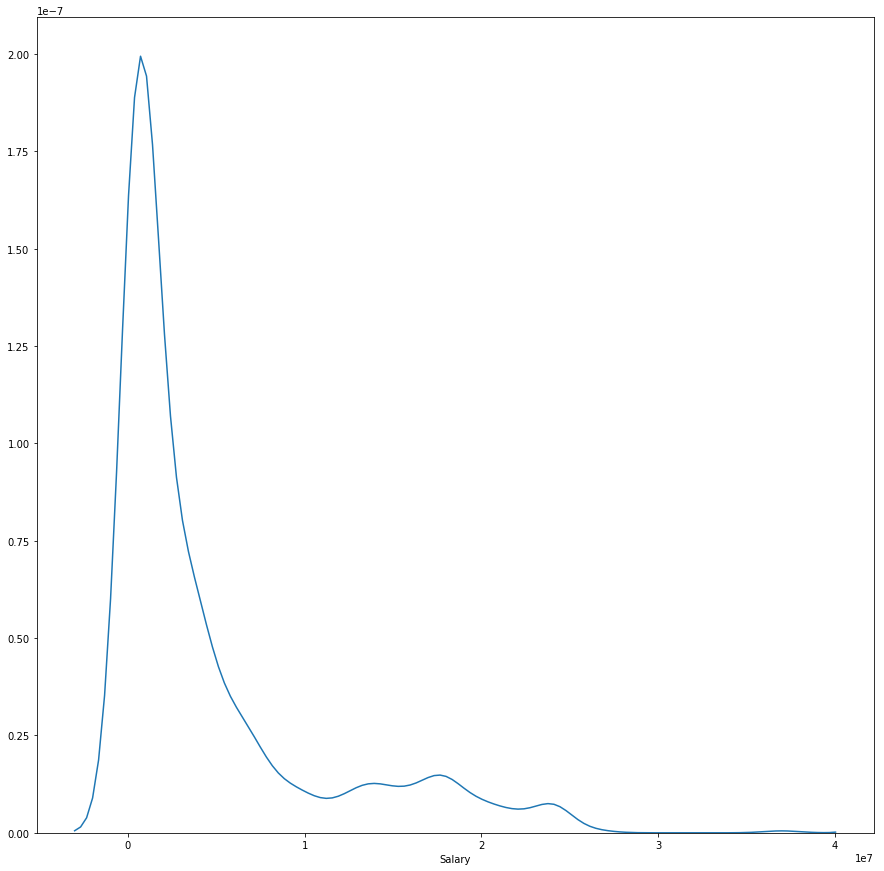

In [159]:
## create a larger figure for the plot to fill, create a density plot of quarterback salaries
plt.subplots(figsize = (15, 15))
sns.distplot(all_qbs.Salary, hist = False)

The distribution of quarterback salaries is very right skewed, and the minimum quarterback salary is close to the location where most of the data is clustered, so I will leave the observation in the data.

Next, I want to check for missing data.

In [19]:
## using .info to view variables and types. 
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      7944 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


In [31]:
## check how many unique observations there are for each position
pd.value_counts(nfl_salary['Position'])

Quarterback          800
Safety               800
Linebacker           800
Special Teamer       800
Offensive Lineman    800
Tight End            800
Defensive Lineman    800
Cornerback           800
Running Back         800
Wide Receiver        800
Name: Position, dtype: int64

In [60]:
## check how many unique observations there are per year
pd.value_counts(nfl_salary['year'])

2015    1000
2011    1000
2018    1000
2014    1000
2017    1000
2013    1000
2016    1000
2012    1000
Name: year, dtype: int64

It looks like the data is spread evenly over all positions and all years. However, when examining the output of the .info call, it looks like the salary column has fewer observations than the others, which means it probably has missing values. I want to examine these missing values and decide whether to drop the observations with missing data or input values.

In [61]:
## using .isnull to index out any columns that have null values
nfl_salary.columns[nfl_salary.isnull().any()]

Index(['Salary'], dtype='object')

The above code confirms that the salary variable has missing values.

In [62]:
## view the rows from nfl_salary that contain missing values 
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary
3297,2011,Quarterback,NaN
3298,2011,Quarterback,NaN
3299,2011,Quarterback,NaN
3388,2012,Quarterback,NaN
3389,2012,Quarterback,NaN
3390,2012,Quarterback,NaN
3391,2012,Quarterback,NaN
3392,2012,Quarterback,NaN
3393,2012,Quarterback,NaN
3394,2012,Quarterback,NaN


It looks like the majority of players with missing salaries are Quarterbacks, with one special teams player. I'm going to input the average special teamer player salary in 2011 for the special teamer missing a salary, since it's only one value and likely wouldn't have changed the overall average and distribution of special teamer salaries by a large amount (there are 800 observations for each position). I'm only using the average in 2011 in case special teamer salaries have changed over time.

In [63]:
## filter the nfl_salary dataframe for special teams players in 2011, then calculate the mean salary for those players and
## assign it to spec_team_mean. Use np.nanmean to ignore missing values.
sp_teamers_11 = nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & (nfl_salary.year == 2011)]
spec_team_mean = np.nanmean(sp_teamers_11.Salary)

In [64]:
## replace the missing salary for the special teams player with the previously calculated mean
nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & 
               (nfl_salary.year == 2011) &
               (nfl_salary.Salary.isnull()), 'Salary'] = spec_team_mean

Now to deal with the missing salaries for quarterbacks. I want to determine whether it would be appropriate to replace the missing quarterback salaries with the average quarterback salary for a given year.

In [65]:
## get the null salary values, group them by year, and count how many quarterbacks in each year have a missing salary
nfl_salary[nfl_salary.isnull().any(axis = 1)].groupby('year').count()

,Position,Salary
year,,
2011,3,0
2012,12,0
2013,7,0
2014,11,0
2015,3,0
2016,5,0
2017,3,0
2018,11,0


In [69]:
## find how many quarterback observations there are in 2012
nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & (nfl_salary.year == 2012)].shape

(100, 3)

Since there are 100 observations containing quarterback salary info in 2012, I think it would be appropriate to input the average 2012 quarterback salary for the missing quarterback salary values in 2012. Since there are an equal number of observations in each year and 2012 has the most missing salary values, I will replace missing quarterback salary values in a given year with that year's average quarterback salary. This should eliminate all missing values in my data.

In [161]:
## create all_years which contains every year in the nfl_salary data
all_years = nfl_salary.year.unique()

In [71]:
## create a for loop which filters for quarterbacks in each year and replaces missing salary values for a given year with the
## average quarterback salary for that year
for i in all_years:
    qbs_in_year = nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & (nfl_salary.year == i)]
    qb_mean = np.nanmean(qbs_in_year.Salary)
    nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & 
               (nfl_salary.year == i) &
               (nfl_salary.Salary.isnull()), 'Salary'] = qb_mean

In [72]:
## double check that all missing values have been replaced
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary


In [73]:
## triple check that all missing values have been replaced
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      8000 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


Now that the data is clean and there are no missing values, I'm going to create some summary statistics and graphs to answer
some questions of interest. Which position has the highest average salary? The highest median salary? Which position has the widest range of salaries?

In [85]:
## calculate the mean salary by position for each year, convert data to make it easier to read
avg_sals = nfl_salary.groupby('Position')[['Position', 'Salary']].mean().sort_values('Salary')
pd.to_numeric(avg_sals['Salary'], downcast = 'float')

Position
Special Teamer       1353947.000
Running Back         1937491.875
Tight End            1964607.750
Safety               2542319.500
Cornerback           3607020.750
Wide Receiver        3904309.250
Linebacker           4488940.500
Quarterback          4525761.500
Defensive Lineman    5277673.000
Offensive Lineman    5348530.000
Name: Salary, dtype: float32

In [86]:
## calculate the median salary by position for each year
nfl_salary.groupby('Position')[['Position', 'Salary']].median().sort_values('Salary')

,Salary
Position,
Running Back,834569.5
Tight End,837913.0
Special Teamer,900000.0
Safety,1597381.5
Quarterback,1743750.0
Cornerback,2235577.0
Wide Receiver,2600000.0
Linebacker,3431139.0
Defensive Lineman,4145908.0


In [130]:
## find the maximum salary by position
nfl_salary.groupby('Position')['Salary'].max()

Position
Cornerback           20000000.0
Defensive Lineman    26100000.0
Linebacker           22100000.0
Offensive Lineman    17545000.0
Quarterback          37000000.0
Running Back         15400000.0
Safety               13000000.0
Special Teamer        5250000.0
Tight End            12262000.0
Wide Receiver        20558000.0
Name: Salary, dtype: float64

In [132]:
## find the minimum salary by position
nfl_salary.groupby('Position')['Salary'].min()

Position
Cornerback            600000.0
Defensive Lineman    1400000.0
Linebacker           1243687.0
Offensive Lineman    1873750.0
Quarterback            24705.0
Running Back          455125.0
Safety                555000.0
Special Teamer        128824.0
Tight End             371824.0
Wide Receiver         655812.0
Name: Salary, dtype: float64

It looks like Offensive Lineman get paid the highest average and median salary. Let's see how the different positions' average salaries look over time.

In [103]:
## create nfl_salary2, which aggregates the salary values for each position in each year to the average salary, 
## making the positions into columns and leaving the year as the index
nfl_salary2 = nfl_salary.pivot_table(values = 'Salary', index = 'year', columns = 'Position', aggfunc = np.mean)

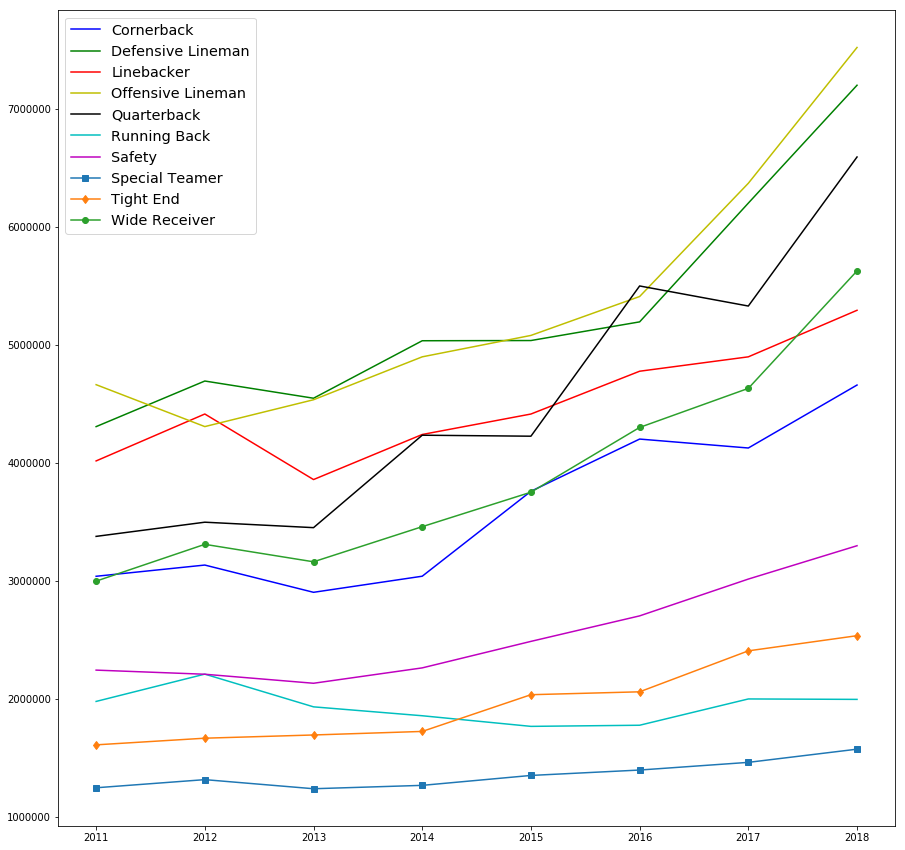

In [122]:
## use plt.subplots to create larger space for plot to fill
## create pos_columns, which contains the column names of nfl_salary2
## create pos_colors, which contains each position name and the corresponding color/line type to plot it as
## create for loop which plots a line plot for each position's average salary over time
## format the legend using plt.legend
plt.subplots(figsize = (15, 15))
pos_columns = list(nfl_salary2)
pos_colors = {'Cornerback':'b-', 'Defensive Lineman':'g-', 'Linebacker':'r-', 'Offensive Lineman':'y-', 
              'Quarterback':'k-','Running Back':'c-', 'Safety':'m-', 'Special Teamer':'s-',
              'Tight End':'d-', 'Wide Receiver':'o-'}
for pos in pos_columns:
    plt.plot(nfl_salary2.index, nfl_salary2[pos], pos_colors[pos], label = pos)
plt.legend(loc = 'best', fontsize = 'x-large')

The average salary for most positions have been increasing over the past 8 years. However, the average salary for running backs
has decreased. Could this reflect less value being placed on running backs and increased value being placed on tight ends and 
wide receivers? That question may be answerable using the next dataset that I analyze.

I also want to see which positions have the most variability in their salary levels. 

[Text(0,0,'Cornerback'),
 Text(0,0,'Defensive Lineman'),
 Text(0,0,'Linebacker'),
 Text(0,0,'Offensive Lineman'),
 Text(0,0,'Quarterback'),
 Text(0,0,'Running Back'),
 Text(0,0,'Safety'),
 Text(0,0,'Special Teamer'),
 Text(0,0,'Tight End'),
 Text(0,0,'Wide Receiver')]

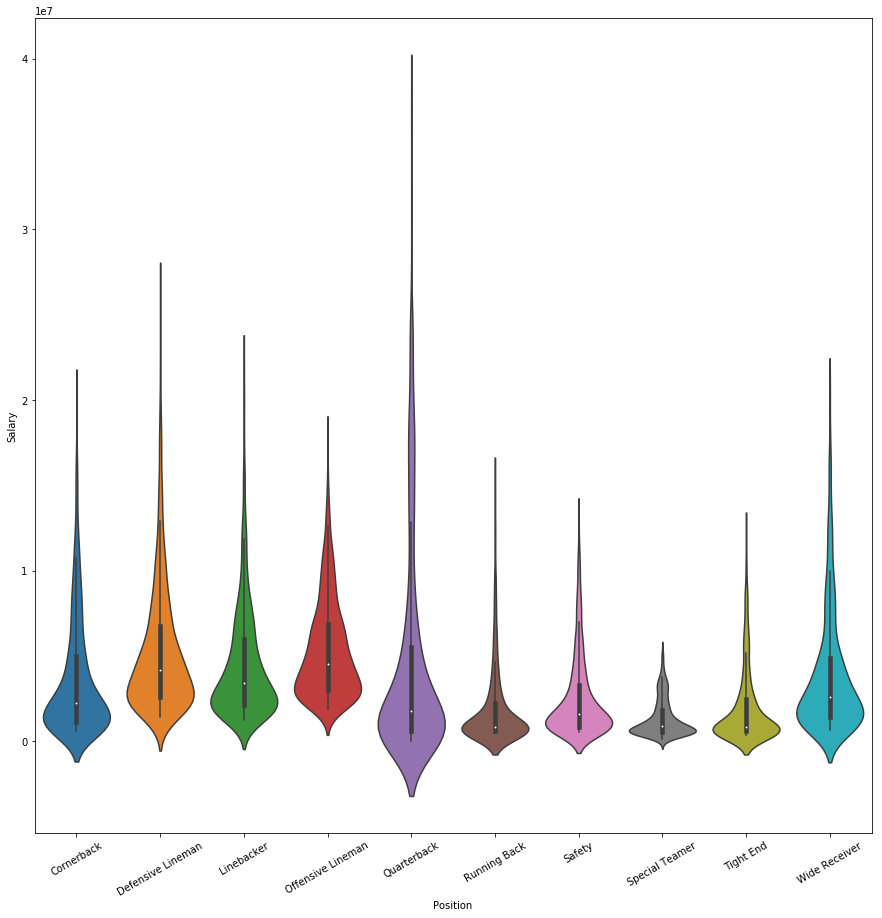

In [183]:
## create violin plot showing the distribution of salaries by position
plt.subplots(figsize = (15, 15))
pos_viol = sns.violinplot(x = 'Position', y = 'Salary', data = nfl_salary, scale = 'width')
pos_viol.set_xticklabels(pos_viol.get_xticklabels(), rotation=30)

Offensive lineman have the highest salary on average, but quarterbacks in the NFL have the most potential for making a lot of money.

Quarterbacks by far have the widest distribution of salaries, containing the highest and the lowest salaries in the whole dataset with a max of 37,000,000 and a minimum of 24,705.

Overall, the average salaries for players in the NFL have been increasing during the past 8 years for every position except running backs. Playing offensive line is the most likely scenario that will fetch you the highest salary on average. Defensive lineman and quarterbacks have had very similar trends in salary, although there is huge earning potential as a quarterback. Running back salaries have been stagnant, and in the future I would be curious to see if special team player salaries ever reach the same level as running backs'.

Now for my second dataset. It contains statistics for NFL players across several games and several seasons. It contains running,
receiving, and passing yards, fumbles, QB ratings, etc. I want to use this dataset to see which nfl team had the highest output offense (in terms of passing and rushing yards) as well as which quarterbacks held the highest average rating in each year. I want to see if the quarterbacks who had top ratings led high output offenses. I would also like to investigate my question that arose during the analysis of the previous dataset: Do stagnant running back salaries reflect less value being placed on running backs and increased value being placed on tight ends and wide receivers?

In [184]:
## use pandas to read in nfl_stats data
nfl_stats = pd.read_csv("C:/Users/camer/Desktop/nfl_stats.csv")

In [185]:
## make sure data read in correctly
nfl_stats.head()

,Unnamed: 0,name,team,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,...,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,position
0,1,Duce Staley,PHI,2000,1,26.0,201.0,7.7,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
1,2,Lamar Smith,MIA,2000,1,27.0,145.0,5.4,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
2,3,Tiki Barber,NYG,2000,1,13.0,144.0,11.1,2.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
3,4,Stephen Davis,WAS,2000,1,23.0,133.0,5.8,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
4,5,Edgerrin James,IND,2000,1,28.0,124.0,4.4,1.0,1.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB


In [186]:
## the first column is a duplicate of dataframe index. Display column names
nfl_stats.columns.values

array(['Unnamed: 0', 'name', 'team', 'game_year', 'game_week', 'rush_att',
       'rush_yds', 'rush_avg', 'rush_tds', 'rush_fumbles', 'rec',
       'rec_yds', 'rec_avg', 'rec_tds', 'rec_fumbles', 'pass_att',
       'pass_yds', 'pass_tds', 'int', 'sck', 'pass_fumbles', 'rate',
       'position'], dtype=object)

In [187]:
## remove the first column
nfl_stats = nfl_stats.drop('Unnamed: 0', axis = 1)

In [193]:
## check that removal worked 
nfl_stats.head()

,name,team,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,...,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,position
0,Duce Staley,PHI,2000,1,26.0,201.0,7.7,1.0,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
1,Lamar Smith,MIA,2000,1,27.0,145.0,5.4,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
2,Tiki Barber,NYG,2000,1,13.0,144.0,11.1,2.0,0.0,3.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
3,Stephen Davis,WAS,2000,1,23.0,133.0,5.8,1.0,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
4,Edgerrin James,IND,2000,1,28.0,124.0,4.4,1.0,1.0,6.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB


Now I want to check for any outliers.

In [197]:
## run .describe to get simple summary stats of all variables excluding character variables and variables for year/week
nfl_stats.describe(exclude = ['object', 'int64'])

,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate
count,33815.000000,33815.000000,33815.000000,33815.000000,33815.000000,64803.000000,64803.000000,64803.000000,64803.000000,64803.000000,10481.00000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000
mean,6.961201,28.910809,4.053373,0.205353,0.082212,2.715831,31.228601,10.155359,0.187985,0.031511,27.64345,193.080431,1.162294,0.798302,1.877206,0.151608,81.565318
std,7.285874,35.927843,4.593679,0.496990,0.299220,2.201397,32.361871,7.903188,0.447792,0.180688,13.53352,105.802970,1.134173,0.970343,1.695610,0.405367,31.916764
min,0.000000,-34.000000,-34.000000,0.000000,0.000000,0.000000,-22.000000,-22.000000,0.000000,0.000000,0.00000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,0.000000,0.000000,1.000000,8.000000,5.100000,0.000000,0.000000,21.00000,126.000000,0.000000,0.000000,1.000000,0.000000,60.200000
50%,4.000000,15.000000,3.500000,0.000000,0.000000,2.000000,21.000000,9.000000,0.000000,0.000000,30.00000,204.000000,1.000000,1.000000,2.000000,0.000000,82.100000
75%,10.000000,42.000000,5.300000,0.000000,0.000000,4.000000,45.000000,13.500000,0.000000,0.000000,37.00000,267.000000,2.000000,1.000000,3.000000,0.000000,103.200000
max,43.000000,296.000000,77.000000,5.000000,3.000000,21.000000,329.000000,99.000000,4.000000,2.000000,68.00000,527.000000,7.000000,7.000000,12.000000,3.000000,158.300000


It doesn't look like there are any outliers that would cause issues, so I'll move on to checking for missing data.

In [198]:
## run .info to get count of observations by variable as well as variable types
nfl_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81525 entries, 0 to 81524
Data columns (total 22 columns):
name            81525 non-null object
team            75237 non-null object
game_year       81525 non-null int64
game_week       81525 non-null int64
rush_att        33815 non-null float64
rush_yds        33815 non-null float64
rush_avg        33815 non-null float64
rush_tds        33815 non-null float64
rush_fumbles    33815 non-null float64
rec             64803 non-null float64
rec_yds         64803 non-null float64
rec_avg         64803 non-null float64
rec_tds         64803 non-null float64
rec_fumbles     64803 non-null float64
pass_att        10481 non-null float64
pass_yds        10481 non-null float64
pass_tds        10481 non-null float64
int             10481 non-null float64
sck             10481 non-null float64
pass_fumbles    10481 non-null float64
rate            10481 non-null float64
position        81525 non-null object
dtypes: float64(17), int64(2), object(3)

There are actually many missing values in the dataset, but that's because some of the variables don't apply to all of the players in the data: some of the variables in the data are position exclusive. I want to check for differences between the number of observations that variables for the same position have. For example, all variables that start with rush should have the same number of observations. The 'rec' variables should all have the same number, and variables pass_att through rate should have the same number of observations, since they are all for quarterbacks.

The only variable that doesn't seem to have an accurate number of observations is the team column. It should have the same 
number of observations as the name variable and the game_year and game_week variables.

Now I want to get a general picture of what the data looks like:

In [208]:
## print the number of players in the data
print('There are', len(nfl_stats.name.unique()), 'players in the data.')
## print the number of teams
print('There are', len(nfl_stats.team.unique()), 'teams in the data.')
## print the number of years the data covers
print('The data covers', len(nfl_stats.game_year.unique()), 'years.')
## print the number of weeks per season that the data covers
print('The data covers', len(nfl_stats.game_week.unique()), 'weeks per year.')
## print all the positions in the data
print('The players in the data play the positions', nfl_stats.position.unique())

There are 2758 players in the data.
There are 36 teams in the data.
The data covers 18 years.
The data covers 16 weeks per year.
The players in the data play the positions ['RB' 'QB' 'WR/TE']


There are 2758 players in the dataset, covering all 36 teams for their 16 regular season games over each of 18 years. There are 3 positions in the dataset: Running Back, Quarterback, and Wide Receiver/Tight End.

Now to investigate and handle the missing data in the team column.

In [213]:
## create 'missing_teams', containing all the data where the team variable is missing
missing_teams = nfl_stats[nfl_stats.team.isnull()]

In [217]:
## create 'miss_yrs', containing all the years that have missing data
miss_yrs = missing_teams.game_year.unique()
miss_yrs

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [226]:
## create 'all_yrs', containing every year from the full dataset
## use np.isin to filter out the years from 'all_yrs' that are not in 'miss_yrs' and store them in full_yrs
all_yrs = nfl_stats.game_year.unique()
full_yrs = all_yrs[np.isin(all_yrs, miss_yrs, invert = True)]
full_yrs

array([2000, 2017], dtype=int64)

2000 and 2017 are the only years where none of the players are missing team info. I want to know how many players are actually missing team info, and whether it's data I could easily find.

In [236]:
## find how many unique player names there are in the missing_teams dataframe
len(missing_teams.name.unique())

345

There are 345 players missing the team variable, which is a lot more than I can input by hand for this assignment. Maybe some of the years only have a couple players with a missing team variable, so if I could find their teams I could have more years of complete data.

In [237]:
## group the observations in missing_teams by game_year to see how many players with missing team info there are per year
missing_teams.groupby('game_year').name.unique()

game_year
2001    [LaDainian Tomlinson, Marshall Faulk, Curtis C...
2002    [LaDainian Tomlinson, Fred Taylor, Terrell Fle...
2003    [Fred Taylor, LaDainian Tomlinson, Marshall Fa...
2004    [Marshall Faulk, LaDainian Tomlinson, Fred Tay...
2005    [Fred Taylor, LaDainian Tomlinson, Steven Jack...
2006    [LaDainian Tomlinson, Steven Jackson, Fred Tay...
2007    [Steven Jackson, Michael Turner, Maurice Jones...
2008    [LaDainian Tomlinson, Steven Jackson, Fred Tay...
2009    [Maurice Jones-Drew, Steven Jackson, LaDainian...
2010    [Maurice Jones-Drew, Steven Jackson, Ryan Math...
2011    [Maurice Jones-Drew, Carnell Williams, Steven ...
2012    [Maurice Jones-Drew, Steven Jackson, Rashad Je...
2013    [Daryl Richardson, Maurice Jones-Drew, Ryan Ma...
2014    [Zac Stacy, Toby Gerhart, Ryan Mathews, Benny ...
2015    [Melvin Gordon, T.J. Yeldon, Benny Cunningham,...
2016    [Danny Woodhead, Melvin Gordon, Philip Rivers,...
Name: name, dtype: object

It looks like there's more than a couple players with missing teams per year, but I can't see the exact numbers, so I'll use a for loop and the len() function.

In [238]:
## create yr_vec which contains all the years in the missing_teams dataframe
## for each year in yr_vec, print the length of an array containing the names of every player missing team info in a given year
yr_vec = missing_teams.game_year.unique()
for yr in yr_vec:
    cur_yr_data = missing_teams[missing_teams.game_year == yr]
    print(len(cur_yr_data.name.unique()))

47
46
58
50
47
43
53
51
50
56
62
59
55
54
53
20


Every year except 2000 and 2017 is missing data for quite a few players, so I don't think I'll spend time inputing the teams manually.

To answer the question from my previous dataset of whether stagnant running back salaries reflect less value being placed on running backs and increased value being placed on tight ends and wide receivers, I want to compare the composition of offensive yardage across all years in the NFL. The missing team information won't limit this analysis, since I'm just comparing the proporiton of yards gained by rushing to yards gained by passing over the years in the dataset. My hypothesis is that the number of offensive yards gained by running backs has decreased in proportion to the number of passing yards gained by an offense. In this sense, running backs have become less valuable and are therefore not getting paid more.

In [249]:
## create stat_sum, which groups the data by year and sums up all the observations for each variable
stat_sum = nfl_stats.groupby('game_year').sum()

In [258]:
## create variable 'run_prop', which is the ratio of rushing yards to passing yards
stat_sum['run_rat'] = stat_sum['rush_yds'] / stat_sum['pass_yds']

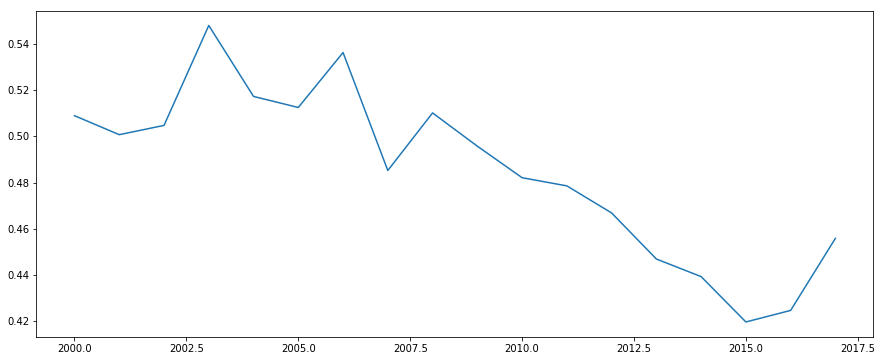

In [259]:
## create space for plot to fill
## create line plot of the ration of rushing to passing yards over time
plt.subplots(figsize = (15, 6))
plt.plot(stat_sum.index, stat_sum.run_rat)

The ratio of rushing to passing yards has decreased over the last 17 years. This may help explain why running back salaries haven't been increasing like the salaries for other positions.

Now I want to start answering my other questions: Which NFL team had the highest output offense (in terms of overall yards gained)? Which quarterbacks held the highest average rating? Did the quarterbacks with the highest ratings also lead high output offenses?

Since all the years except 2000 and 2017 are missing data on what team many players belonged to, I won't be able to accurately compare stats across teams in those years. I'm going to focus on the years 2000 and 2017 for this portion of the analysis, since they aren't missing any data.

In [ ]:
yearly_stats = full_data.groupby('team').sum()

In [ ]:
yearly_stats

In [ ]:
yearly_stats['total_yds'] = yearly_stats['rush_yds'] + yearly_stats['pass_yds']

In [ ]:
yearly_stats = yearly_stats.sort_values('total_yds', ascending = False)

In [ ]:
yearly_stats.head()

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes('pastel')
sns.barplot(x = yearly_stats.index, y = 'total_yds', data = yearly_stats, label = 'Total', color = 'b')
sns.set_color_codes('muted')
sns.barplot(x = yearly_stats.index, y = 'rush_yds', data = yearly_stats, label = 'Rush', color = 'b')
ax.legend(ncol = 2, loc = 'upper right', frameon = True)
ax.set(ylabel = 'Total Offensive Yards', xlabel = 'Team')

It looks like New England has the highest output offense with New Orleans close behind. The majority of every team's total yardage comes from passing. I wonder if there are divisions in the NFL that are stronger than others in terms of overall offense.

In [ ]:
divs = pd.read_csv("C:/Users/camer/Desktop/Machine_Learning/nfl_divisions.csv")

In [ ]:
div_stats = pd.merge(yearly_stats, divs, on = 'team')
yearly_stats = pd.merge(yearly_stats, divs, on = 'team')

In [ ]:
div_stats.head()

In [ ]:
div_stats = div_stats.groupby('div').sum()

In [ ]:
div_stats.head()

In [ ]:
div_stats = div_stats.sort_values('total_yds', ascending = False)

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes('pastel')
sns.barplot(x = div_stats.index, y = 'total_yds', data = div_stats, label = 'Total', color = 'g')
sns.set_color_codes('muted')
sns.barplot(x = div_stats.index, y = 'rush_yds', data = div_stats, label = 'Rush', color = 'g')
ax.legend(ncol = 2, loc = 'upper right', frameon = True)
ax.set(ylabel = 'Total Offensive Yards', xlabel = 'Division')

In [ ]:
yearly_stats[yearly_stats['div'] == 'NFC South']['team']

New Orleans, Atlanta, Tampa Bay, and Carolina are in the NFC south, the division with the most offensive yards.

Now I want to look at which quarterbacks have the highest ratings and whether teams with a lot of yards are led by quarterbacks with the best ratings.

In [ ]:
qbs = nfl_stats[(nfl_stats['position'] == 'QB') & (nfl_stats['game_year'] == 2017)]

In [ ]:
qbs.head()

In [ ]:
avg_rates = qbs.groupby('name').mean().sort_values('rate', ascending = False)

In [ ]:
avg_rates.head()

In [ ]:
top_rated = avg_rates[:5]


In [ ]:
top_rated.index

In [ ]:
travel_data = pd.read_excel("C:/Users/camer/Desktop/mbta.xlsx")